# Notebook to make Figure 1

In [ ]:
# Import necessary packages & set-up plotting aesthetics

import numpy as np 
import importlib
import json
import h5ify
import os
import tqdm
import imageio

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib import style
style.use('../utils/plotting.mplstyle')
from matplotlib.lines import Line2D

import seaborn as sns
cp = sns.color_palette('muted')
cp2 = sns.color_palette('pastel')

import sys
sys.path.append('../utils')
import plotting_functions as pf

# where data is saved
data_dir = '../data/real_and_maxL_GW190521/'

### Setup

Load data

In [1]:
# Load in the posteriors 
posteriors_dict = {
    'realData' : h5ify.load(data_dir+'GW190521_realData.h5'), 
    'maxL' : h5ify.load(data_dir+'GW190521_maxL.h5')
}

# Load in the prior
prior_dict = h5ify.load(data_dir+'prior.h5')

# Load in the maxL parameters
maxL_params = h5ify.load(data_dir+'GW190521_maxL_parameters.h5')

# Load in the strain 
strain_dict = h5ify.load(data_dir+'GW190521_maxL_strain_conditioned.h5')
    
# Load in the JSDs 
JSD_dict = h5ify.load(data_dir+'real_vs_maxL_JSDs.h5')

Set up plotting aesthetics

In [2]:
# the cuts we look at 
cuts_float = [-1.5, -0.5, 0.0, 1.5, 2.0]
cuts = [int(c) if c.is_integer() else c for c in cuts_float]

# parameters we want to look at
params = {
    'mtotal':'M', 
    'q':'q', 
    'chi_p_m100M':'\chi_p'
}

plotting_kws = {
    'maxL pre':dict(color=cp[0], histtype='step', lw=2, density=True, label=r'max. $\mathcal{L}$ pre-$t_\mathrm{cut}$'), 
    'maxL post':dict(color=cp[1], histtype='step', lw=2, density=True, label=r'max. $\mathcal{L}$ post-$t_\mathrm{cut}$'), 
    'maxL full':dict(color='k', histtype='step', lw=2, density=True, label=r'max. $\mathcal{L}$ full'), 
    
    'realData pre':dict(color=cp2[0], histtype='stepfilled', alpha=0.7, density=True, label=r'real data pre-$t_\mathrm{cut}$'), 
    'realData post':dict(color=cp2[1], histtype='stepfilled', alpha=0.7, density=True, label=r'real data post-$t_\mathrm{cut}$'), 
    'realData full':dict(color='k', histtype='stepfilled', alpha=0.3, density=True, label='real data full'), 
    
    'prior':dict(color='gray', lw=2, ls=':', histtype='step', density=True, label='prior')
}

ymaxes = {
    'mtotal':0.051, 
    'q':5, 
    'chi_p_m100M':2.95
}

bounds_dict = {
    'mtotal':[200,320], 
    'q':[0.18, 1],
    'chi_p_m100M':[0,1],
}

<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
/local/simona.miller/ipykernel_2268518/3673517601.py:9: SyntaxWarning: invalid escape sequence '\c'
  'chi_p_m100M':'\chi_p'


### Make Figure

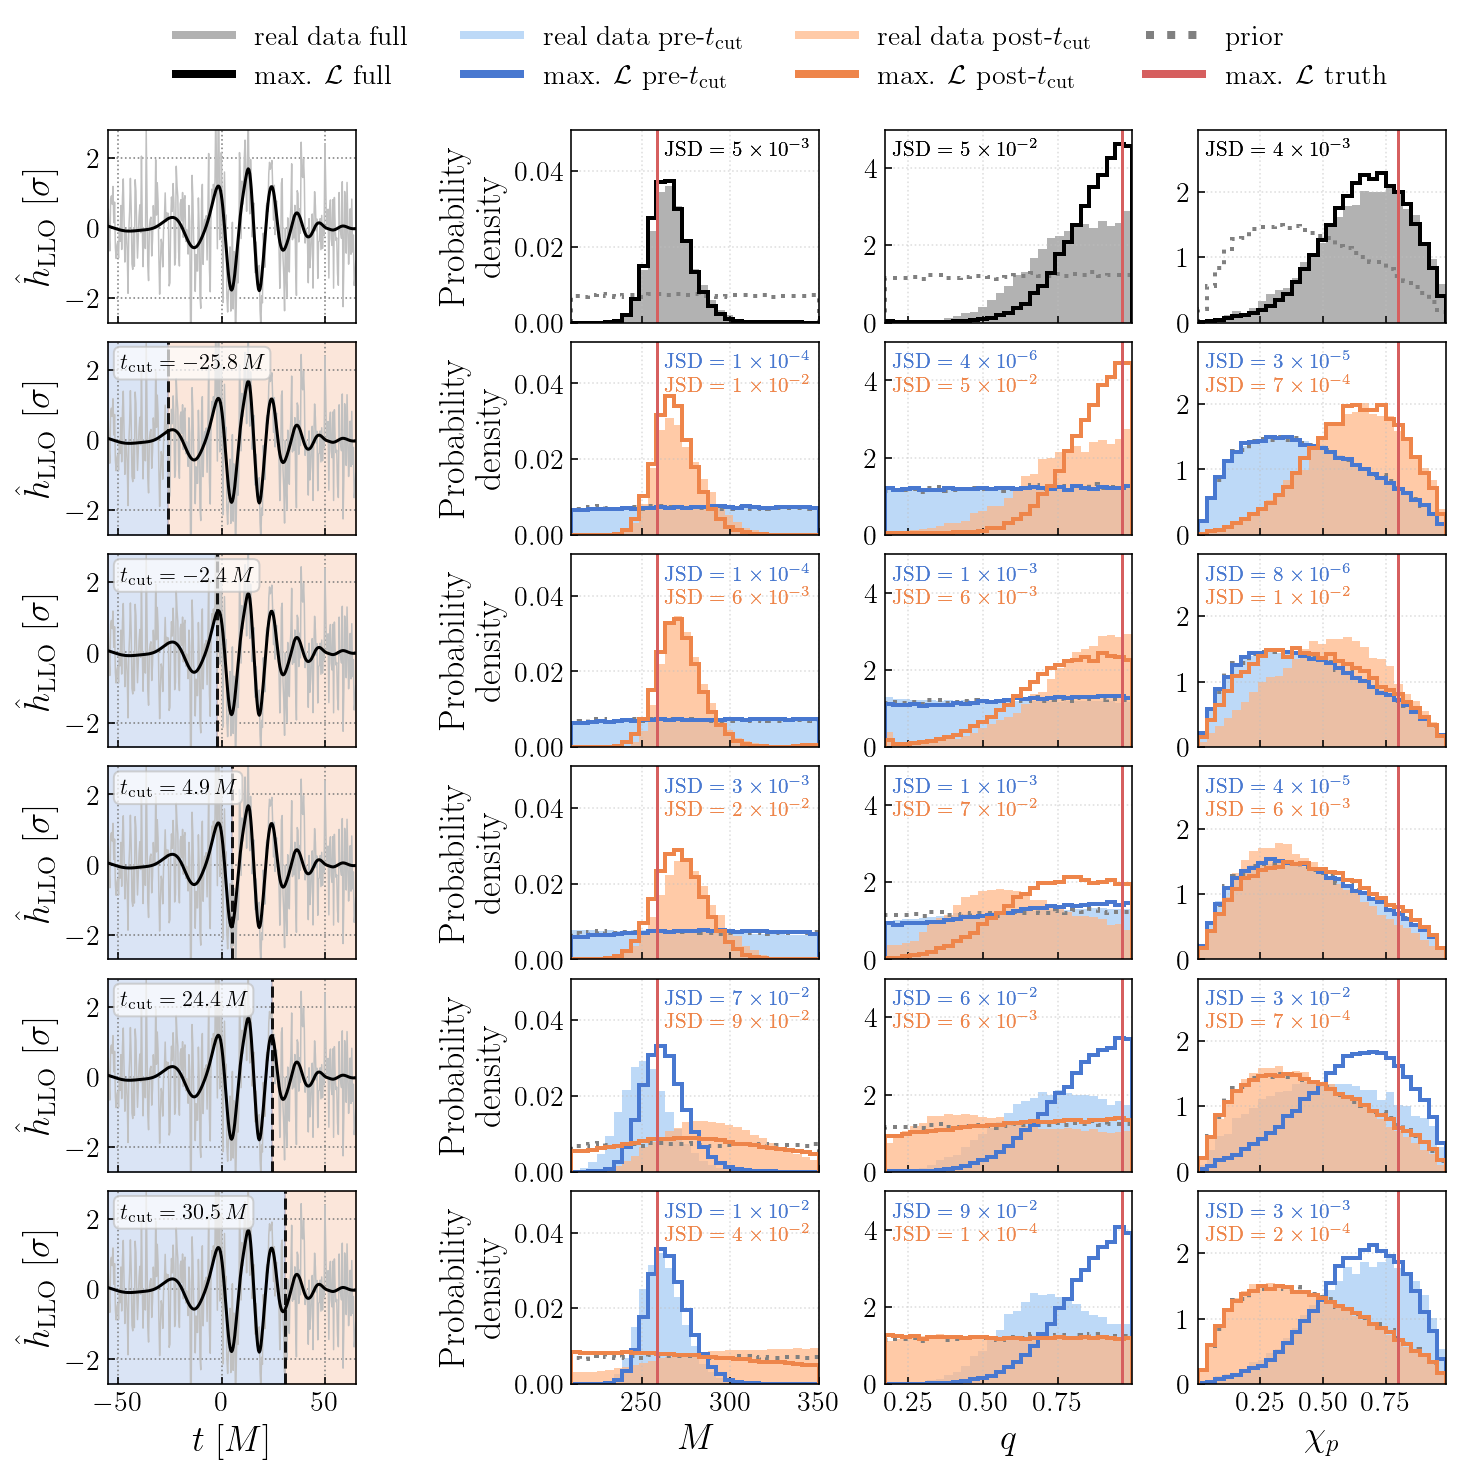

In [3]:
importlib.reload(pf)

# get plot
fig, axes = pf.plot_posteriors_and_waveform(
    posteriors_dict, cuts, params, maxL_params, ymaxes, plotting_kws, strain_dict, prior_dict=prior_dict, unit='M', JSD_dict=JSD_dict, 
)

# add legend
key_order = ['realData full', 'maxL full', 'realData pre', 'maxL pre', 'realData post', 'maxL post', 'prior']
handles = [
    Line2D(
        [], [],
        color = plotting_kws[x]['color'], 
        label = plotting_kws[x]['label'], 
        alpha = plotting_kws[x]['alpha'] if 'alpha' in plotting_kws[x].keys() else 1, 
        ls = plotting_kws[x]['ls'] if 'ls' in plotting_kws[x].keys() else '-'
    ) 
    for x in key_order
]
handles.append(Line2D([], [], color=cp[3], label=r'max. $\mathcal{L}$ truth'))


legend_kws = dict(
    handles=handles, ncol=int(len(handles)/2), loc='upper center', bbox_to_anchor=(0.5, 0.958), 
    handlelength=2
)

pf.add_legend(fig, **legend_kws)
plt.savefig('figure_01.png', dpi=300, bbox_inches='tight')